In [2]:
import numpy as np
import cv2
import os
from sklearn import svm

In [3]:
def preprocess_image(image_path, target_size=(128, 128)):
    """
    Preprocesses an image by resizing and converting to grayscale.
    """
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

In [4]:
def load_images_from_folder(folder_path):
    """
    Loads and preprocesses images from a folder.
    """
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        if os.path.isfile(img_path):
            preprocessed_img = preprocess_image(img_path)
            images.append(preprocessed_img)
    return images

In [6]:
unhealthy_images_folder = r"C:\Users\geeth\Downloads\PAI700\Data\Unhealthy"
unhealthy_images = load_images_from_folder(unhealthy_images_folder)

In [7]:
# Convert images to numpy array
X_unhealthy = np.array(unhealthy_images)

In [8]:
# Flatten image arrays
X_unhealthy_flat = X_unhealthy.reshape(X_unhealthy.shape[0], -1)


In [9]:
one_class_svm = svm.OneClassSVM(nu=0.5, kernel="sigmoid", gamma=0.1)  # Adjust parameters based on your dataset
one_class_svm.fit(X_unhealthy_flat)


OneClassSVM(gamma=0.1, kernel='sigmoid')

In [23]:
one_class_svm = svm.OneClassSVM(nu=0.5, kernel="rbf", gamma=0.5)  # Adjust parameters based on your dataset
one_class_svm.fit(X_unhealthy_flat)


OneClassSVM(gamma=0.5)

In [10]:
# Function to predict image health
def predict_image_health(image_path, model):
    """
    Predicts whether an image contains healthy or unhealthy fungi.
    """
    prediction = model.predict(image_path)
    return ["Healthy" if pred == 1 else "Unhealthy" for pred in prediction]

In [12]:
# Test prediction on a sample image
sample_image_path = r"C:\Users\geeth\Downloads\PAI700\test_pics\test_pics"
sample_images = load_images_from_folder(sample_image_path)

In [13]:
# Convert images to numpy array
sample_images = np.array(sample_images)

In [14]:
# Flatten image arrays
sample_images_flat = sample_images.reshape(sample_images.shape[0], -1)

In [15]:
predictions = predict_image_health(sample_images_flat, one_class_svm)
for i, prediction in enumerate(predictions):
    print(f"Prediction for image {i+1}: {prediction}")

Prediction for image 1: Unhealthy
Prediction for image 2: Unhealthy
Prediction for image 3: Unhealthy
Prediction for image 4: Unhealthy
Prediction for image 5: Unhealthy
Prediction for image 6: Unhealthy
Prediction for image 7: Unhealthy
Prediction for image 8: Unhealthy
Prediction for image 9: Unhealthy
Prediction for image 10: Unhealthy
Prediction for image 11: Unhealthy
Prediction for image 12: Unhealthy
Prediction for image 13: Unhealthy
Prediction for image 14: Unhealthy
Prediction for image 15: Unhealthy
Prediction for image 16: Unhealthy
Prediction for image 17: Unhealthy
Prediction for image 18: Unhealthy
Prediction for image 19: Unhealthy
Prediction for image 20: Unhealthy
Prediction for image 21: Unhealthy
Prediction for image 22: Unhealthy
Prediction for image 23: Unhealthy
Prediction for image 24: Unhealthy
Prediction for image 25: Unhealthy
Prediction for image 26: Unhealthy
Prediction for image 27: Unhealthy
Prediction for image 28: Unhealthy
Prediction for image 29: Unhe

In [17]:
import matplotlib.pyplot as plt

In [19]:
def plot_clusters_decision_boundary(X, model, labels):
    """
    Plots clusters and decision boundary of the model.
    """
    # Predict labels for each data point
    cluster_labels = model.predict(X)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', label='Cluster')

    # Plot actual labels
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='green', marker='o', edgecolors='black', label='Fungus')
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', marker='x', label='Non-Fungus')

    plt.title('Clusters and Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()


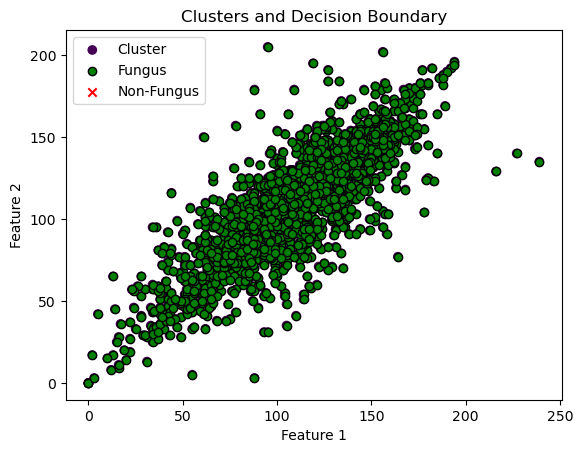

In [21]:
plot_clusters_decision_boundary(X_unhealthy_flat, one_class_svm, np.ones(X_unhealthy_flat.shape[0]))


In [24]:
def plot_clusters_decision_boundary(X, model, labels):
    """
    Plots clusters and decision boundary of the model.
    """
    # Predict labels for each data point
    cluster_labels = model.predict(X)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', label='Cluster')

    # Plot actual labels
    plt.scatter(X[labels == 1, 0], X[labels == 1, 1], c='green', marker='o', edgecolors='black', label='Fungus')
    plt.scatter(X[labels == -1, 0], X[labels == -1, 1], c='red', marker='x', label='Non-Fungus')

    plt.title('Clusters and Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()



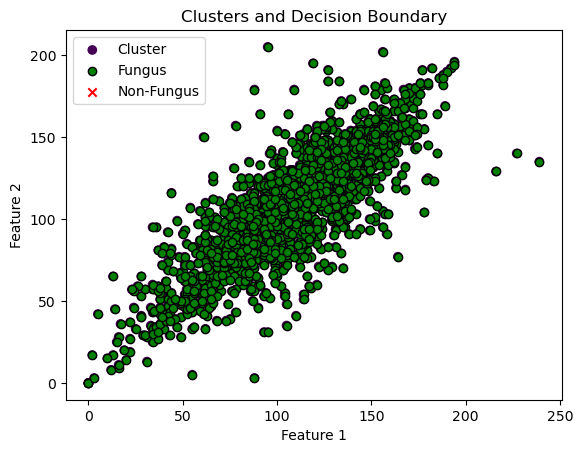

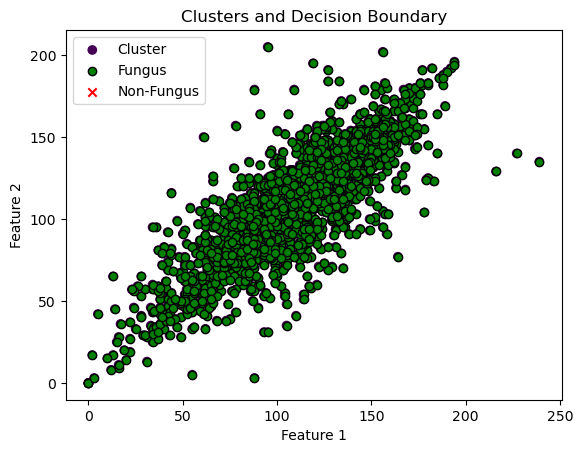

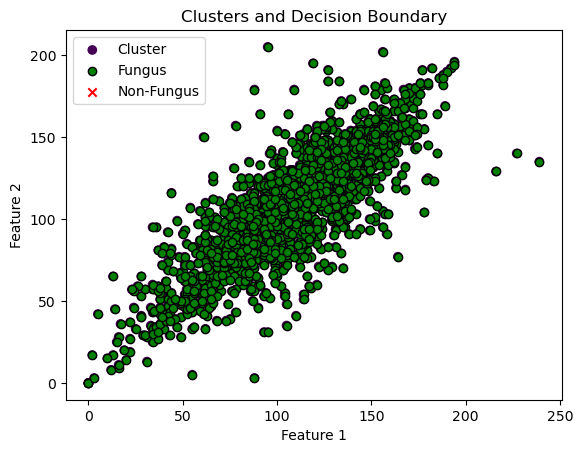

In [25]:
plot_clusters_decision_boundary(X_unhealthy_flat, one_class_svm, np.ones(X_unhealthy_flat.shape[0]))


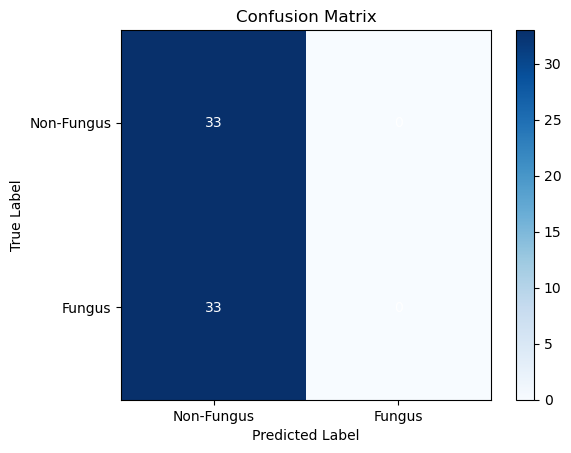

In [22]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels):
    """
    Plots the confusion matrix.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, ['Non-Fungus', 'Fungus'])
    plt.yticks(tick_marks, ['Non-Fungus', 'Fungus'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

# Test prediction on a sample image
true_labels = np.array([0] * int(sample_images_flat.shape[0]/2) + [1] * int(sample_images_flat.shape[0]/2))  # Assuming half of the images are non-fungus and half are fungus
predicted_labels = [1 if pred == "Healthy" else 0 for pred in predictions]

# Plot confusion matrix
plot_confusion_matrix(true_labels, predicted_labels)


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(true_labels, predicted_labels):
    """
    Plots the confusion matrix.
    """
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(cm))
    plt.xticks(tick_marks, ['Non-Fungus', 'Fungus'])
    plt.yticks(tick_marks, ['Non-Fungus', 'Fungus'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()

# Test prediction on a sample image
true_labels = np.array([0] * int(sample_images_flat.shape[0]/2) + [1] * int(sample_images_flat.shape[0]/2))  # Assuming half of the images are non-fungus and half are fungus
predicted_labels = [1 if pred == "Healthy" else 0 for pred in predictions]

# Plot confusion matrix
plot_confusion_matrix(true_labels, predicted_labels)
